# Понижение размерности

В настоящей тетради мы рассмотрим различные методы понижения размертности данных, а именно: анализ главных компонент (PCA — Principal Component Analysis) и неотрицательная матричная факторизация (NMF — Non-negative Matrix Factorization). А также рассмотрим упрощённые примеры применения этих алгоритмов в задачах машинного обучения.

***

## Знакомство с алгоритмами

Ознакомимся с основными концепциями и положениями алгоритмов PCA, ICA и NMF в общих чертах.

### PCA

Анализ главных компонент суть алгоритм понижения размерности пространства данных, предназначенный для обобщения информации путём исключения наиболее коррелирующих (линейно зависимых) признаков, сохраняя при этом самую суть (наиболее линейно независимые признаки). PCA широко применим в машинном обучении и позволяет получить более показательное представление о данных, изначально требовавших большого количества измерений для собственного отображения. Основным математическим методом, лежащим в основе обозреваемого алгоритма, является вычилсение собственных значений и векторов матрицы корреляции.

### NMF

Неотрицательная матричная факторизация — альтернатива PCA, которая может и заменить его в случае, если в данных нет отрицательных значений. В отличие от PCA, представление вектора получается аддитивным способом, путем наложения компонентов без вычитания. Такие аддитивные модели эффективны для представления изображений и текста.

***

## Практические примеры

Посмотрим, как можно на практике применить PCA в гипотетической задаче машинного обучения при помощи фреймворка Scikit-Learn.

Начнём с импортирования библиотек.

In [1]:
from typing import Literal

import matplotlib.pyplot as plt
from numpy import ndarray
from pandas import read_csv
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Загрузим теперь наши данные и получим некоторые описательные статистики по каждому столбцу.

In [2]:
wine = read_csv("datasets/winequality_red.csv")

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Как видим, столбцов всего 12:

In [3]:
len(wine.columns)

12

Это значит, что для представления одной точки данных нужно 12 измерений. Посмотрим, получится ли понизить их количество при помощи PCA до трёх.

Однако сначала выполним рутинную преварительную обработку.

In [4]:
wine_numpy = wine.to_numpy()
x, y = wine_numpy[:, :-1], wine_numpy[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=52)

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Применение PCA

Теперь, когда у нас имеются уже обработанные данные, применим метод главных компенент.

In [5]:
pca = PCA(n_components=3)

pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Визуализируем результат применения алгоритма для тренировочной выборки. Код для визуализации обернём в функцию, так как он нам ещё не раз пригодится.

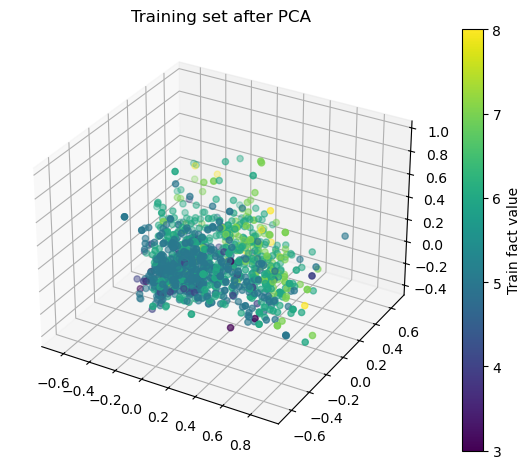

In [6]:
def scatter_3d(
    x_arr: ndarray,
    y_arr: ndarray,
    z_arr: ndarray,
    *,
    color: ndarray,
    axis_title: str,
    colorbar_label: str,
) -> None:
    fig = plt.figure()
    axis = fig.add_subplot(projection="3d")
    scatter = axis.scatter(x_arr, y_arr, z_arr, c=color)
    colorbar = fig.colorbar(scatter)
    
    axis.set_title(axis_title)
    colorbar.set_label(colorbar_label)
    plt.tight_layout()
    plt.show()


scatter_3d(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    x_train_pca[:, 2],
    color=y_train,
    axis_title="Training set after PCA",
    colorbar_label="Train fact value",
)

И для тестовой выборки сделаем то же.

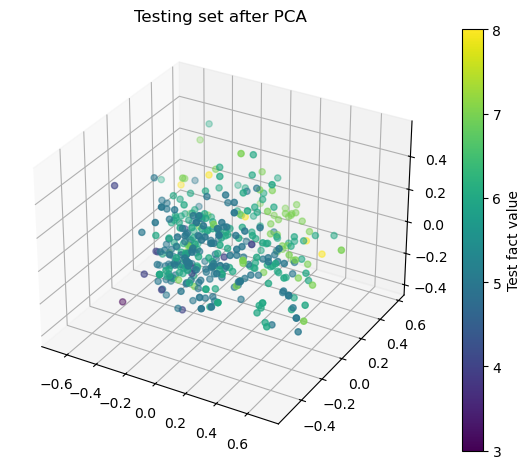

In [7]:
scatter_3d(
    x_test_pca[:, 0],
    x_test_pca[:, 1],
    x_test_pca[:, 2],
    color=y_test,
    axis_title="Testing set after PCA",
    colorbar_label="Test fact value",
)

Рассмотрим теперь другой метод понижения размерности.

### Применение NMF

Применим сейчас метод неотрицательной матричной факторизации.

In [8]:
nmf = NMF(n_components=3)

nmf.fit(x_train_scaled)
x_train_nmf = nmf.transform(x_train_scaled)
x_test_nmf = nmf.transform(x_test_scaled)

Так же визуализируем результат применения алгоритма для тренировочной выборки.

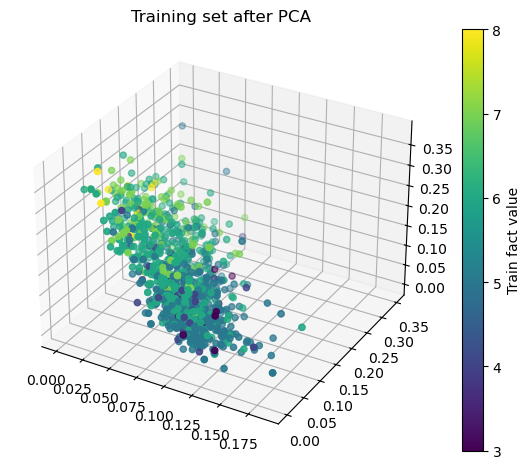

In [9]:
scatter_3d(
    x_train_nmf[:, 0],
    x_train_nmf[:, 1],
    x_train_nmf[:, 2],
    color=y_train,
    axis_title="Training set after PCA",
    colorbar_label="Train fact value",
)

И для тестовой выборки.

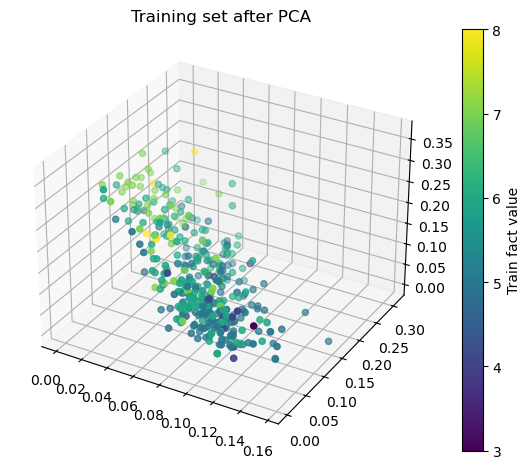

In [10]:
scatter_3d(
    x_test_nmf[:, 0],
    x_test_nmf[:, 1],
    x_test_nmf[:, 2],
    color=y_test,
    axis_title="Training set after PCA",
    colorbar_label="Train fact value",
)

Попробуем теперь обучить модель, пользуясь разобраными выше методами.

### Обучение моделей и оценки

В этом подразделе обучим обыкновенный `sklearn.linear_model.LinearRegression` с параметрами по умолчанию и оценим качество предсказаний с различными количествами компонент для алгоритмов понижения размерности.

Код для применения алгоритма, тренировки и оценки модели обернём функцию, чтоб использовать снова.

In [11]:
def train_evaluate_regressor(
    x_train: ndarray,
    x_test: ndarray,
    y_train: ndarray,
    y_test: ndarray,
    *,
    algorithm: Literal["pca", "nmf"],
    n_components: int,
) -> float:
    alg = None
    if algorithm == "pca":
        alg = PCA(n_components=n_components)
    if algorithm == "nmf":
        alg = NMF(n_components=n_components)
    regressor = LogisticRegression()

    alg.fit(x_train)
    x_train_alg = alg.transform(x_train)
    x_test_alg = alg.transform(x_test)
    regressor.fit(x_train_alg, y_train)
    y_predicted = regressor.predict(x_test_alg)
    error = float(mean_absolute_percentage_error(y_predicted, y_test))
    
    return error

#### PCA

Для начала попробуем с PCA и количеством компонентов равным восьми.

In [12]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="pca",
    n_components=8,
)

0.08323809523809522

Понизим количество компонент до четырёх.

In [13]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="pca",
    n_components=4,
)

0.09092857142857143

И до трёх.

In [14]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="pca",
    n_components=3,
)

0.09126190476190477

#### NMF

А сейчас приступим к NMF. Настройки алгоритмов на каждом шаге изменим. Начнём теперь с четырёх и закончим теперь вообще двумя.

Четыре компонента:

In [15]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="nmf",
    n_components=4,
)

0.09974999999999999

Три компонента:

In [16]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="nmf",
    n_components=3,
)

0.09541666666666668

И, наконец, оставим всего два компонента.

In [17]:
train_evaluate_regressor(
    x_train_scaled,
    x_test_scaled,
    y_train,
    y_test,
    algorithm="nmf",
    n_components=2,
)

0.11908333333333335

Подведём итоги.

***

## Заключение

В этой тетради мы рассмотрели элементарные примеры использования алгоритмов понижения размерности и изучили, как можно при их помощи визуализировать данные. Также мы применили алгоритмы в процессе решения гипотетической задачи машинного обучения (оценка качества красного вина).

Выполнив несложные эксперименты с количеством компонент, можно сказать, NMF с набором данных о качестве красного вина справился хуже, чем PCA. Интересно заметить, что неотрицательная матричная факторизация показала себя лучше именно при `n_components=3`.

Алгоритмы понижения размерности являются очень полезными инструментами при визауализации многомерных данных и потенциально могут ускорить процесс обучения вашей модели.